In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [20]:
data = pd.read_csv('University_of_Arkansas_Courses_2016-2020.csv')
data

,Department,Course Catalogue Number,Course Number,Description,Graduate/Undergraduate,Lab,Year,Keywords
0,African and African American Studies (AAST),b'4273',b'AAST\xc2\xa04273 Comparative Slavery',b'\nExplores the meaning of slavery around the...,NaN,NaN,2019-2020,[' slavery ']
1,African and African American Studies (AAST),b'4813',b'AAST\xc2\xa04813 Africans and Slavery in Co...,b'\nExplores the diverse experiences of slaves...,NaN,NaN,2019-2020,[' slavery ']
2,African and African American Studies (AAST),b'4963',b'AAST\xc2\xa04963 Third World Underdevelopme...,b'\nExamines key issues related to societal ch...,NaN,NaN,2019-2020,['food']
3,Agricultural Economics (AGEC),b'1103',b'AGEC\xc2\xa01103 Principles of Agricultural...,"b'\nIntroduction to agricultural economics, in...",NaN,NaN,2019-2020,['agri']
4,Agricultural Economics (AGEC),b'1103H',b'AGEC\xc2\xa01103H Honors Principles of Agri...,"b'\nIntroduction to agricultural economics, in...",NaN,NaN,2019-2020,['agri']
...,...,...,...,...,...,...,...,...
3599,Sustainability (SUST),b'5303',"b'SUST\xc2\xa05303 Sustainable Global Food, E...",b'\nProvides a detailed review of the existing...,NaN,NaN,2016-2017,"['agri', 'food']"
3600,Theatre (THTR),b'4953',b'THTR\xc2\xa04953 Theatre Study in Britain',b'\nStudy of the components of stage productio...,NaN,NaN,2016-2017,['land']
3601,Theatre (THTR),b'5953',b'THTR\xc2\xa05953 Theatre Study in Britain',b'\n(Formerly THTR\xc2\xa04953.) Study of the ...,NaN,NaN,2016-2017,['land']
3602,Walton College of Business (WCOB),b'3023',b'WCOB\xc2\xa03023 Sustainability in Business',b'\nThe course focuses on theoretical and prac...,NaN,NaN,2016-2017,['land']


In [21]:
data['Keywords'] = data['Keywords'].apply(lambda x: x[1:-1].split(', '))
clean_data = data.explode('Keywords')

In [22]:
# frequency of top 50 keywords
frequency_top50 = clean_data['Keywords'].value_counts().to_frame().head(50)
frequency_top50.head()

,Keywords
'agri',720
'land',604
'food',592
' animal',464
' nutri',343


In [23]:
# frequency of top 50 keywords in each department
by_department = clean_data[clean_data['Keywords'].isin(frequency_top50.index)].groupby(['Department','Keywords']).count()
frequency_in_department = by_department.loc[:,['Course Catalogue Number']].rename(columns={'Course Catalogue Number':'Count'})
frequency_in_department.head()

Count
Department                                  Keywords          
African and African American Studies (AAST) ' slavery '      8
                                            'food'           4
Agricultural Economics (AGEC)               ' animal'        4
                                            ' fiber'        12
                                            ' nutri'         8

In [24]:
# top keyword in each department
by_department_fullkeywords = clean_data.groupby(['Department','Keywords']).count().loc[:,['Course Catalogue Number']].rename(columns={'Course Catalogue Number':'Count'})
by_department_fullkeywords_reset = by_department_fullkeywords.reset_index()
top_word_in_dept = by_department_fullkeywords_reset.sort_values('Count').groupby('Department').last()
top_word_in_dept

,Keywords,Count
Department,,
African and African American Studies (AAST),' slavery ',8
Agricultural Economics (AGEC),'agri',196
Agricultural Education (AGED),'agri',80
Agricultural Mechanization (AGME),'agri',44
Agricultural Statistics (AGST),'agri',20
...,...,...
Sociology (SOCI),'land',8
Sustainability (SUST),'agri',12
Theatre (THTR),'land',8


In [25]:
#distribution of top 10 
top3_department = by_department_fullkeywords_reset.groupby('Department').sum().sort_values('Count',ascending=False).head(3)
top3_department

,Count
Department,
Animal Science (ANSC),840
Horticulture (HORT),604
Poultry Science (POSC),492


In [26]:
top3_dept_name = top3_department.index
top3_dept_name

Index(['Animal Science (ANSC)', 'Horticulture (HORT)',
       'Poultry Science (POSC)'],
      dtype='object', name='Department')

In [28]:
with pd.ExcelWriter('University_of_Arkansas_EDA.xlsx') as writer:
    frequency_top50.to_excel(writer, sheet_name='Top 50 keywords')
    frequency_in_department.to_excel(writer, sheet_name='Frequency for each Department')
    top_word_in_dept.to_excel(writer, sheet_name='Top keyword in Department')
    top3_department.to_excel(writer, sheet_name='Top 3 Departments')

Text(0.5, 1.0, 'Animal Science (ANSC)')

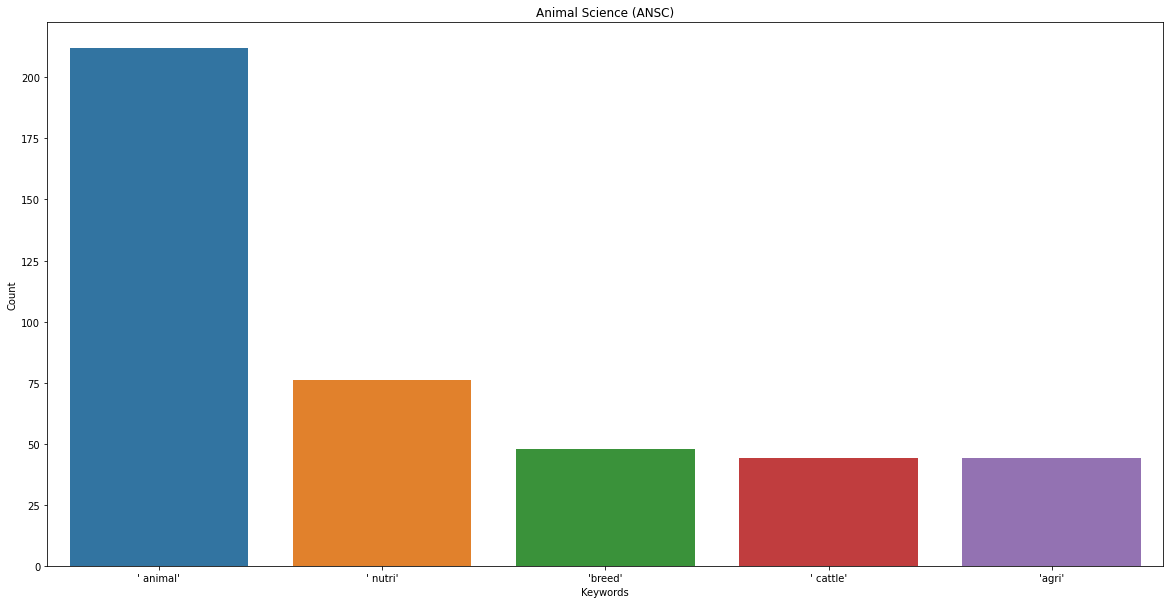

In [16]:
# ANSI
plt.figure(figsize=(20,10))
ANSI = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department']==top3_dept_name[0]].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keywords',y='Count' ,data=ANSI)
plt.title(top3_dept_name[0])

Text(0.5, 1.0, 'Horticulture (HORT)')

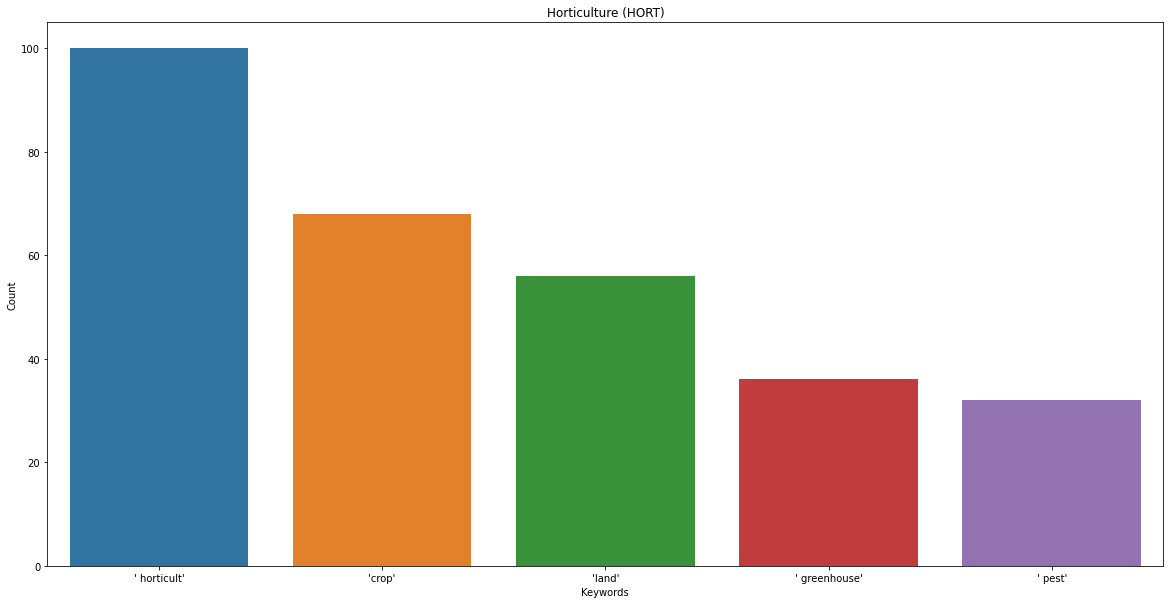

In [17]:
# NSCI
plt.figure(figsize=(20,10))
ANSI = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department']==top3_dept_name[1]].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keywords',y='Count' ,data=ANSI)
plt.title(top3_dept_name[1])

Text(0.5, 1.0, 'Poultry Science (POSC)')

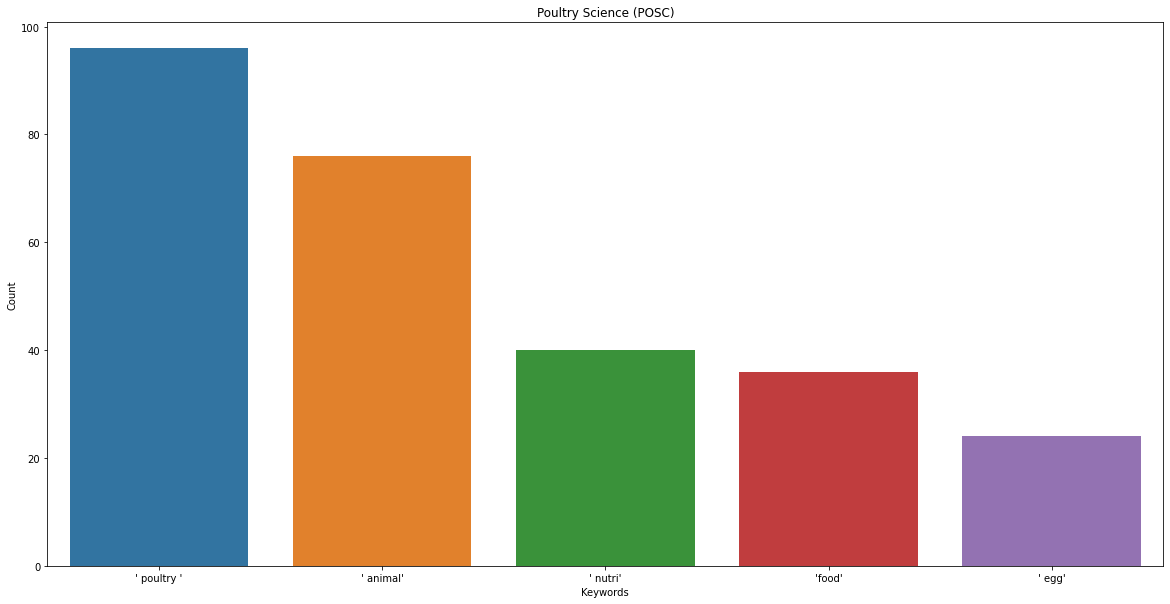

In [18]:

# NREM
plt.figure(figsize=(20,10))
ANSI = by_department_fullkeywords_reset[by_department_fullkeywords_reset['Department']==top3_dept_name[2]].sort_values('Count',ascending=False).head(5)
sns.barplot(x='Keywords',y='Count' ,data=ANSI)
plt.title(top3_dept_name[2])